In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import plotly.express as px

In [58]:
# load dataset
df_purchase = pd.read_csv('../Data Files/purchase_data.csv')
df_purchase.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,Price_5,Promotion_1,Promotion_2,Promotion_3,Promotion_4,Promotion_5,Segment
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,2.09,2.66,0,1,0,0,0,2
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,2.09,2.66,0,0,0,0,0,2
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,2.09,2.66,0,0,0,0,0,2
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,2.09,2.66,0,0,0,0,0,2
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,2.09,2.66,0,0,0,0,0,2


In [59]:
df_purchase = df_purchase.drop(columns=['Last_Inc_Brand','Last_Inc_Quantity'])

df_purchase['Segment'] = df_purchase['Segment'].map({
    0: 'standard',
    1: 'career-focused',
    2: 'fewer-opportunities',
    3: 'well-off'
})

df_purchase['Mean_price'] = (df_purchase['Price_1'] + df_purchase['Price_2'] + df_purchase['Price_3'] + df_purchase['Price_4'] + df_purchase['Price_5']) / 5
df_purchase['Has_Promotion'] = (df_purchase['Promotion_1'] + df_purchase['Promotion_2'] + df_purchase['Promotion_3'] + df_purchase['Promotion_4'] + df_purchase['Promotion_5'])

def get_active_price(record):
    if record['Brand'] == 1: return record['Price_1']
    if record['Brand'] == 2: return record['Price_2']
    if record['Brand'] == 3: return record['Price_3']
    if record['Brand'] == 4: return record['Price_4']
    if record['Brand'] == 5: return record['Price_5']
    return 0

df_purchase['Action_Price'] = df_purchase.apply(lambda x: get_active_price(x), axis=1)

df_purchase.head()

,ID,Day,Incidence,Brand,Quantity,Price_1,Price_2,Price_3,Price_4,Price_5,Promotion_1,Promotion_2,Promotion_3,Promotion_4,Promotion_5,Segment,Mean_price,Has_Promotion,Action_Price
0,200000001,1,0,0,0,1.59,1.87,2.01,2.09,2.66,0,1,0,0,0,fewer-opportunities,2.044,1,0.0
1,200000001,11,0,0,0,1.51,1.89,1.99,2.09,2.66,0,0,0,0,0,fewer-opportunities,2.028,0,0.0
2,200000001,12,0,0,0,1.51,1.89,1.99,2.09,2.66,0,0,0,0,0,fewer-opportunities,2.028,0,0.0
3,200000001,16,0,0,0,1.52,1.89,1.98,2.09,2.66,0,0,0,0,0,fewer-opportunities,2.028,0,0.0
4,200000001,18,0,0,0,1.52,1.89,1.99,2.09,2.66,0,0,0,0,0,fewer-opportunities,2.030,0,0.0


In [60]:
df_demand = df_purchase[df_purchase['Incidence'] == 1]

In [61]:
df_demand.reset_index(drop='index',inplace=True)

In [62]:
cols = ['Day','Segment','Quantity','Action_Price']

In [63]:
df_demand = df_demand[cols]

In [64]:
df_demand.head()

,Day,Segment,Quantity,Action_Price
0,28,fewer-opportunities,2,1.90
1,58,fewer-opportunities,1,2.62
2,110,fewer-opportunities,2,1.47
3,142,fewer-opportunities,1,2.16
4,183,fewer-opportunities,3,1.88


In [65]:
df_demand = df_demand.groupby(['Day','Segment']).agg({'Quantity':'sum','Action_Price':'mean'}).reset_index()

In [66]:
df_demand

,Day,Segment,Quantity,Action_Price
0,1,career-focused,5,2.660000
1,1,fewer-opportunities,3,1.870000
2,1,standard,3,2.265000
3,1,well-off,21,2.090000
4,3,career-focused,12,2.660000
...,...,...,...,...
2555,726,well-off,6,2.426667
2556,727,career-focused,6,1.820000
2557,727,fewer-opportunities,49,1.839286
2558,727,standard,25,1.897143


In [67]:
fig = px.line(df_demand, x = 'Day', y = 'Quantity', color= 'Segment')
fig.show()

### Demand forecast

In [68]:
df_demand

,Day,Segment,Quantity,Action_Price
0,1,career-focused,5,2.660000
1,1,fewer-opportunities,3,1.870000
2,1,standard,3,2.265000
3,1,well-off,21,2.090000
4,3,career-focused,12,2.660000
...,...,...,...,...
2555,726,well-off,6,2.426667
2556,727,career-focused,6,1.820000
2557,727,fewer-opportunities,49,1.839286
2558,727,standard,25,1.897143


In [69]:
df_sku1 = df_demand[df_demand['Segment'] == 'career-focused'].drop(columns=['Segment','Action_Price'])
df_sku2 = df_demand[df_demand['Segment'] == 'fewer-opportunities'].drop(columns=['Segment','Action_Price'])
df_sku3 = df_demand[df_demand['Segment'] == 'standard'].drop(columns=['Segment','Action_Price'])
df_sku4 = df_demand[df_demand['Segment'] == 'well-off'].drop(columns=['Segment','Action_Price'])

In [70]:
df_sku1['shift_sale'] = df_sku1['Quantity'].shift(1)
df_sku1 = df_sku1.iloc[1:]

In [71]:
def week_avg(sales):
    sum = 0
    week_avg = []
    for i in range(6, -1, -1):
        for j in range(i):
            sum += sales[j]
        if(i!=0):
            week_avg.append(sum/i)
        sum = 0
    week_avg.append(sales[0])
    week_avg.reverse()
    for row in range(len(sales) - 7):
        for row in range(row, row + 7):
            sum += sales[row]
        week_avg.append(sum / 7)
        sum = 0
    return week_avg

In [72]:
weekly_avg = week_avg(df_sku1['Quantity'].to_list())
df_sku1['week_avg'] = weekly_avg

In [113]:
import xgboost as xgb

In [114]:
xgb_r = xgb.XGBRegressor(objective='reg:squarederror', n_estimators = 10, booster = 'gblinear')

In [118]:
train_df = df_sku1.drop(df_sku1.tail(30).index)
test_df = df_sku1.tail(30)

In [119]:
feature_df = train_df.drop('Quantity',axis = 1)
target_df = train_df['Quantity']

In [121]:
x_train, x_test, y_train, y_test = train_test_split(feature_df,target_df,test_size=0.2)

In [ ]:
matrix_train = xgb.DMatrix(x_train, label = y_train)
matrix_test = xgb.DMatrix(x_test, label = y_test)
model = xgb.train(params={'objective':'reg:linear','eval_metric':'mae'}
                ,dtrain = matrix_train, num_boost_round = 500, 
                early_stopping_rounds = 20, evals = [(matrix_test,'test')],)

In [122]:
xgb_r.fit(x_train,y_train)

XGBRegressor(base_score=None, booster='gblinear', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=10, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [123]:
pred = xgb_r.predict(x_test)

In [130]:
test_df

,Day,Quantity,shift_sale,week_avg
2437,693,14,27.0,14.142857
2441,694,19,14.0,14.571429
2445,695,6,19.0,14.000000
2449,696,3,6.0,13.571429
2453,697,29,3.0,13.000000
2457,698,12,29.0,15.142857
2461,699,3,12.0,15.714286
2467,701,2,3.0,12.285714
2471,702,13,2.0,10.571429
2475,703,16,13.0,9.714286


In [131]:
pred = xgb_r.predict(test_df.drop('Quantity', axis=1))

<Axes: xlabel='Day', ylabel='Quantity'>

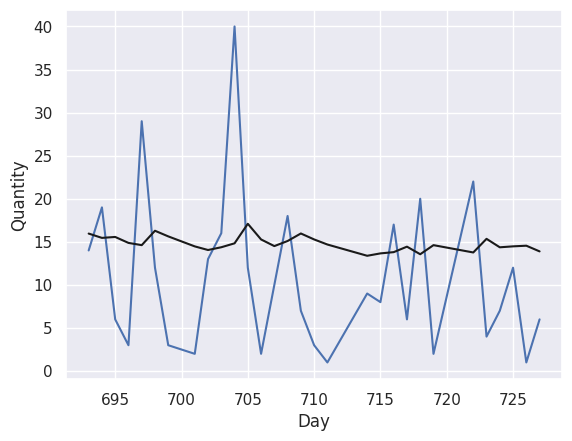

In [132]:
sns.lineplot(test_df, x = test_df['Day'], y = test_df['Quantity'])
sns.lineplot(x= test_df['Day'],y = pred, color = 'k')

In [135]:
matrix_train = xgb.DMatrix(x_train, label = y_train)
matrix_test = xgb.DMatrix(x_test, label = y_test)
model = xgb.train(params={'objective':'reg:squarederror','eval_metric':'mae'}
                ,dtrain = matrix_train, num_boost_round = 1000, 
                early_stopping_rounds = 20, evals = [(matrix_test,'test')],)

[0]	test-mae:12.09574
[1]	test-mae:9.97315
[2]	test-mae:9.27301
[3]	test-mae:9.01071
[4]	test-mae:8.81264
[5]	test-mae:8.78435
[6]	test-mae:8.79228
[7]	test-mae:8.89646
[8]	test-mae:9.03625
[9]	test-mae:9.05143
[10]	test-mae:9.09513
[11]	test-mae:9.14818
[12]	test-mae:9.18522
[13]	test-mae:9.16623
[14]	test-mae:9.16577
[15]	test-mae:9.19879
[16]	test-mae:9.23669
[17]	test-mae:9.27527
[18]	test-mae:9.26887
[19]	test-mae:9.23397
[20]	test-mae:9.24228
[21]	test-mae:9.30225
[22]	test-mae:9.31452
[23]	test-mae:9.38445
[24]	test-mae:9.37647


In [137]:
matrix_pred = xgb.DMatrix(test_df.drop('Quantity', axis =1), label = test_df['Quantity'])

In [138]:
pred = model.predict(matrix_pred)

<Axes: xlabel='Day', ylabel='Quantity'>

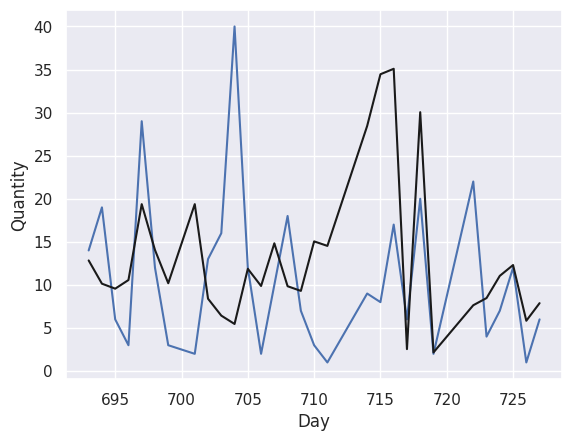

In [139]:
sns.lineplot(test_df, x = test_df['Day'], y = test_df['Quantity'])
sns.lineplot(x= test_df['Day'],y = pred, color = 'k')